In [26]:
#Cristian Rivas

'''
El dataset "Mall Customers" contiene información sobre clientes de un centro comercial, 
proporcionando detalles relevantes sobre su perfil demográfico y hábitos de gasto. 
Este dataset consta de 5 columnas:

1. CustomerID: Identificador único para cada cliente (entero).
2. Gender: Género del cliente (categórico: 'Male' o 'Female').
3. Age: Edad del cliente (entero, en años).
4. Annual Income (k$): Ingreso anual del cliente (en miles de dólares).
5. Spending Score (1-100): Puntuación de gasto del cliente, asignada por el centro comercial 
   con base en su comportamiento de compra.

Tamaño del dataset: 200 filas y 5 columnas.
Fuente: Kaggle.
Este conjunto de datos se utiliza comúnmente para problemas de segmentación de clientes 
(clustering) en análisis de marketing.
'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Cargando el dataset
try:
    df = pd.read_csv('2_Mall_Customers.csv')
    print("Archivo cargado con éxito.")
except FileNotFoundError:
    print("Error: El archivo '2_Mall_Customers.csv' no se encontró. Verifica la ruta y el nombre del archivo.")
    import os
    print("Directorio actual:", os.getcwd())
    raise
except Exception as e:
    print(f"Error inesperado al cargar el archivo: {e}")
    raise

# Mostrar las primeras filas del conjunto de datos
print("\nPrimeras filas del DataFrame cargado:")
print(df.head())

# Identificación de duplicados
duplicados = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicados}")
if duplicados > 0:
    df = df.drop_duplicates()
    print("Filas duplicadas eliminadas.")

# Identificación de valores faltantes
print("\nNúmero de valores faltantes por columna:")
print(df.isnull().sum())

# Seleccionar solo las columnas numéricas (excluyendo 'CustomerID')
numerical_columns = df.select_dtypes(include=['float64', 'int64']).drop(columns=['CustomerID'])

# Crear un DataFrame con las estadísticas descriptivas
stats = numerical_columns.describe()

# Mostrar el cuadro
print("\nEstadísticas descriptivas (parámetros como filas):")
print(stats)


Archivo cargado con éxito.

Primeras filas del DataFrame cargado:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Número de filas duplicadas: 0

Número de valores faltantes por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Estadísticas descriptivas (parámetros como filas):
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721       

C:\Users\HP\AppData\Local\Temp\ipykernel_22348\1220761499.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', ax=axes[0])


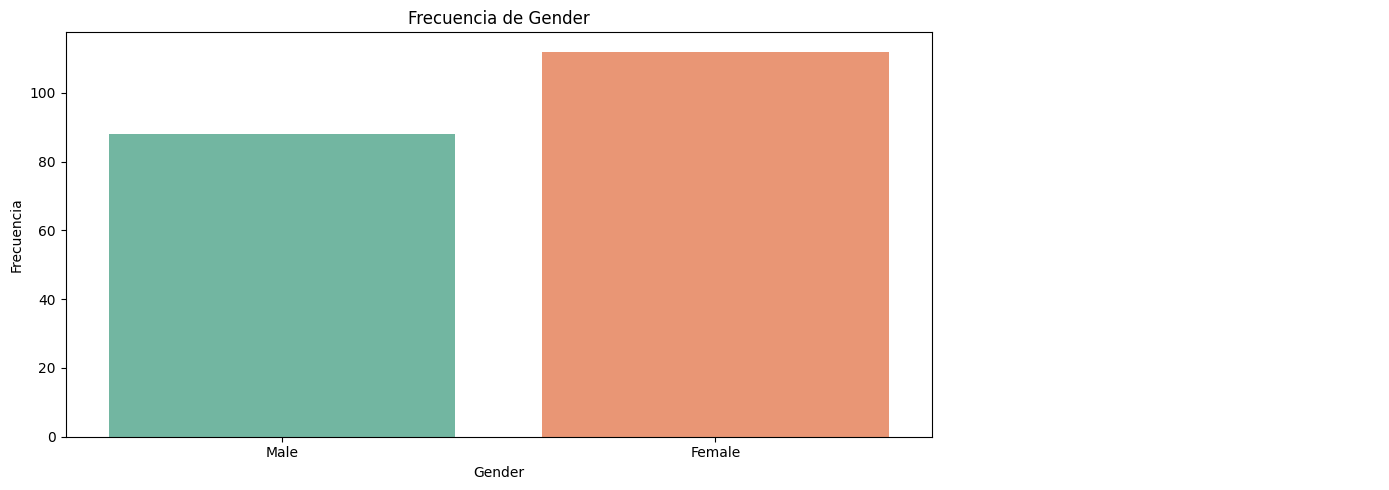

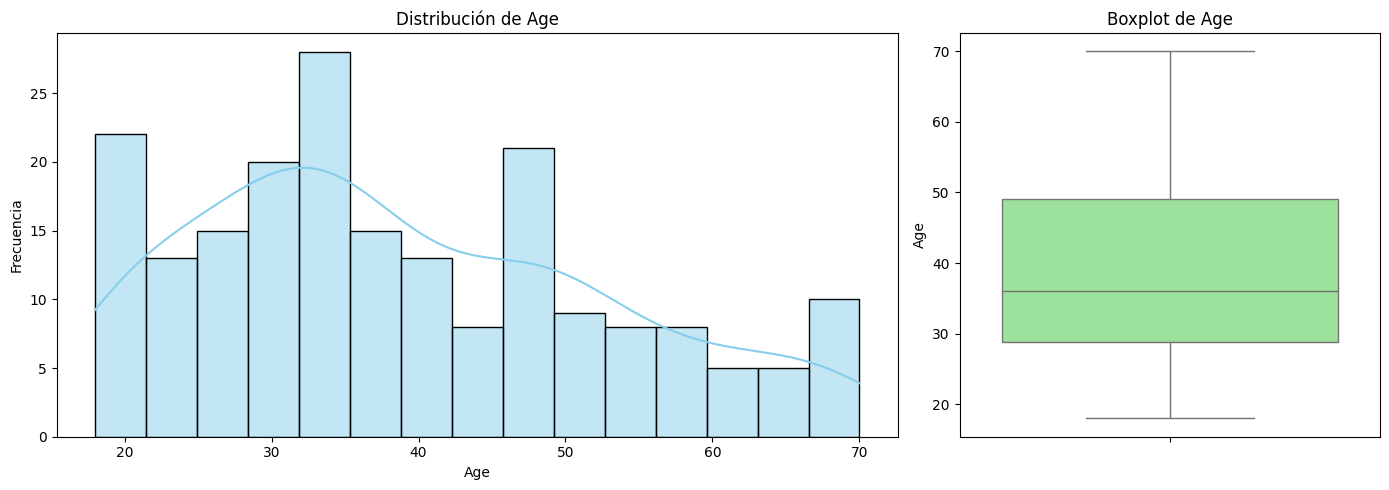

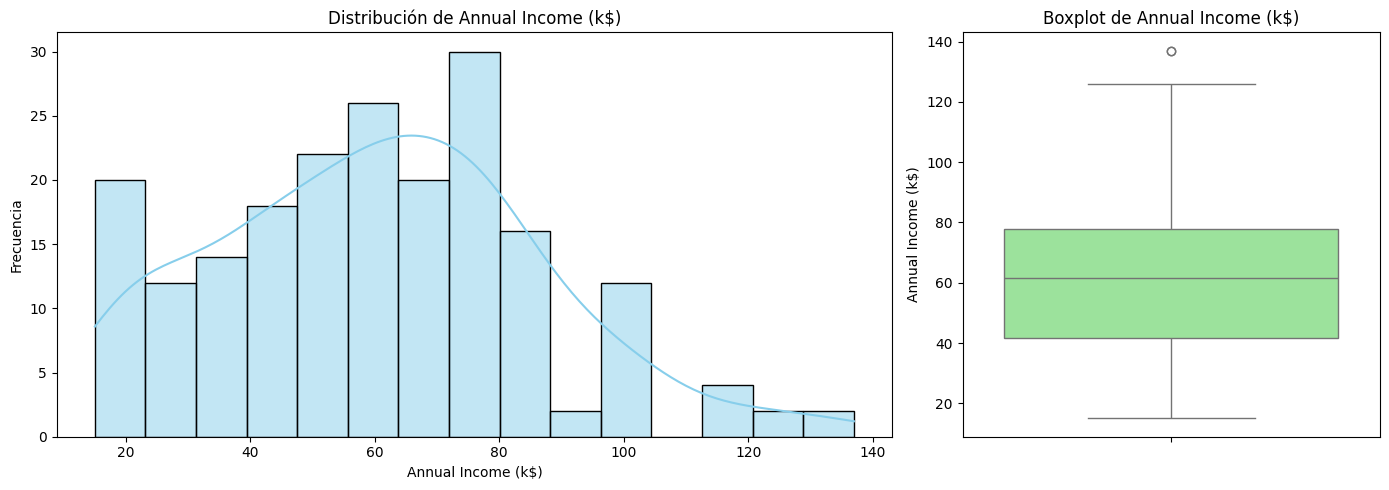

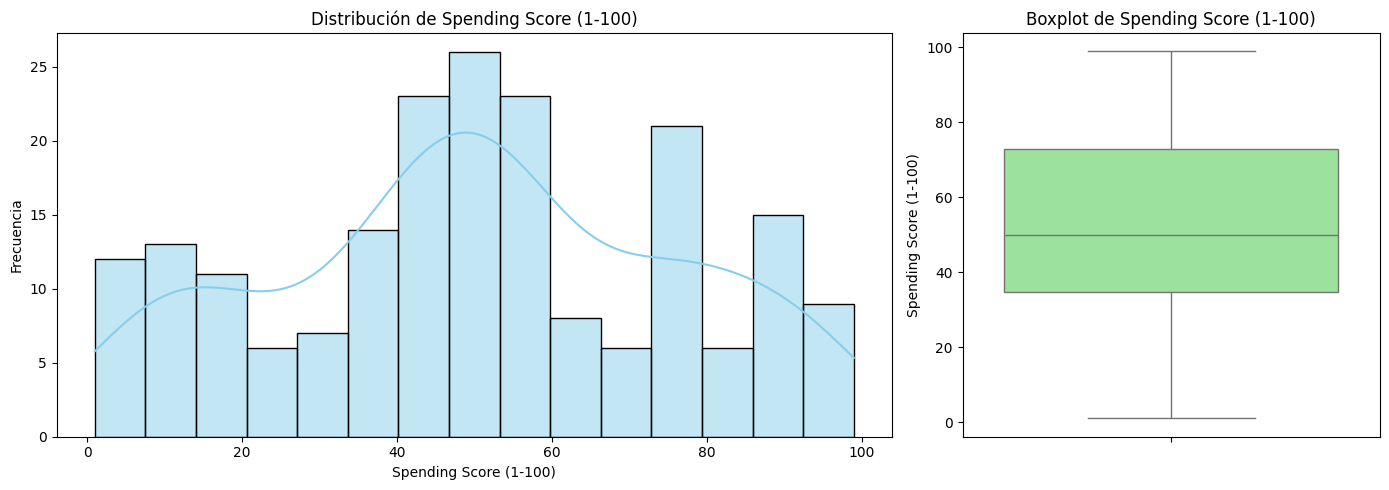

In [27]:
# Excluir CustomerID
columns_to_plot = df.columns.drop('CustomerID')

# Crear gráficos según el tipo de cada columna
for col in columns_to_plot:
    # Crear una figura con dos gráficos lado a lado
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw={'width_ratios': [2, 1]})
    
    # Si la columna es categórica
    if df[col].dtype == 'object':
        # Gráfico de barras
        sns.countplot(x=col, data=df, palette='Set2', ax=axes[0])
        axes[0].set_title(f'Frecuencia de {col}')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Frecuencia')
        
        # Boxplot no es aplicable para datos categóricos, así que lo dejamos vacío
        axes[1].axis('off')
    
    # Si la columna es numérica
    else:
        # Histograma
        sns.histplot(df[col], kde=True, bins=15, color='skyblue', ax=axes[0])
        axes[0].set_title(f'Distribución de {col}')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Frecuencia')
        
        # Boxplot
        sns.boxplot(y=col, data=df, ax=axes[1], color='lightgreen')
        axes[1].set_title(f'Boxplot de {col}')
        axes[1].set_ylabel(col)
        axes[1].set_xlabel('')
    
    # Ajustar espaciado
    plt.tight_layout()
    plt.show()


Estos datos tienen una estructura realista, no se observan valores fuera de lugar

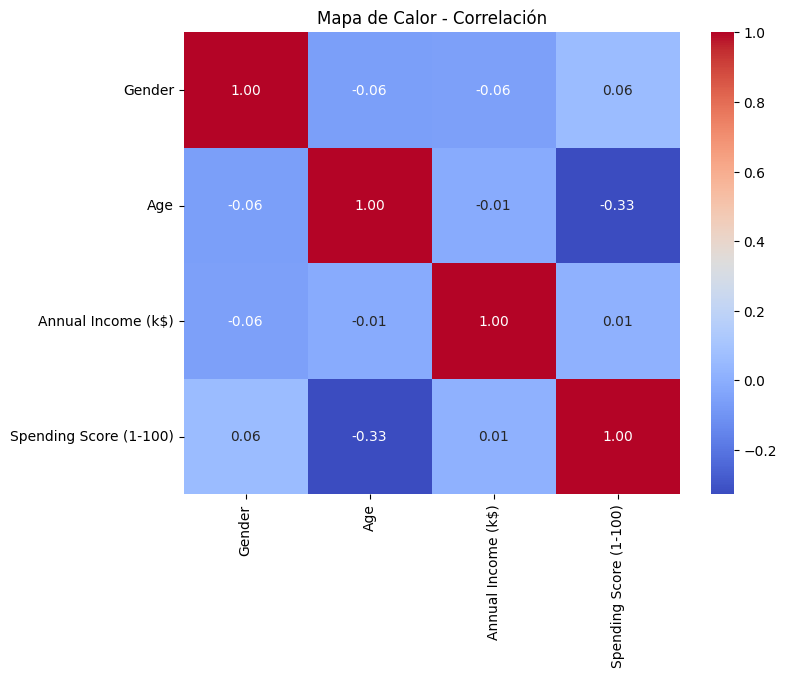

In [28]:

# Descartar CustomerID
df = df.drop(columns=['CustomerID'])

# One-Hot Encoding para Gender (una sola columna binaria)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Escalar las columnas numéricas
scaler = StandardScaler()
scaled_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Aplicar el escalador a las columnas seleccionadas
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

# Crear un mapa de calor con la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor - Correlación')
plt.show()


El análisis exploratorio muestra que la mayoría de los clientes son mujeres, con edades concentradas entre 28 y 50 años, ingresos anuales entre 40k y 80k, y patrones de gasto variados (Spending Score), sin outliers significativos excepto un ingreso anual de 137k. La correlación más destacada es una relación negativa moderada entre la edad y el Spending Score (-0.33), indicando que los clientes más jóvenes tienden a gastar más, mientras que no se observa una relación significativa entre el ingreso y el gasto. Estas características sugieren que el dataset es ideal para segmentación de clientes mediante clustering, dada la diversidad en los datos y la falta de correlaciones lineales claras. Se recomienda manejar el outlier en ingresos y considerar factores externos adicionales para enriquecer el análisis.